## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data = pd.read_csv("Data.csv",nrows=114)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,110,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.0,7.0,Gold,10,17,5
110,111,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Gold,10,17,7
111,112,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Green,10,17,7
112,113,Ahmed Nasser,Male,CS,Senior Student,21,5.0,4.0,4.0,2.0,...,8.0,8.0,9.0,10.0,5.0,8.0,Gold,10,11,17


In [3]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Interface_18         float64
Interface_19         float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 114 non-null    int64  
 1   Name               114 non-null    object 
 2   Gender             114 non-null    object 
 3   Field              114 non-null    object 
 4   Occupation         114 non-null    object 
 5   Age                114 non-null    int64  
 6   Openness           114 non-null    float64
 7   Extraversion       114 non-null    float64
 8   Agreeableness      114 non-null    float64
 9   Conscientiousness  114 non-null    float64
 10  Neuroticism        114 non-null    float64
 11  Interface_1        114 non-null    float64
 12  Interface_2        114 non-null    float64
 13  Interface_3        114 non-null    float64
 14  Interface_4        114 non-null    float64
 15  Interface_5        114 non-null    float64
 16  Interface_6        114 non

<AxesSubplot:xlabel='Gender', ylabel='Count'>

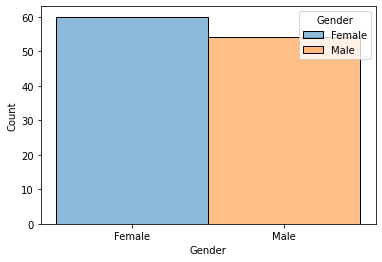

In [5]:
sns.histplot(x='Gender', hue='Gender', data=data)


In [6]:
# data['Interface_9'] = data['Interface_9'].astype('float64')


In [7]:

# data['Neuroticism'] = data['Neuroticism'].astype('float64')

In [8]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Interface_18         6.140351
Interface_19         6.140351
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [9]:
data['Interface_18'].fillna(value=data['Interface_18'].mean(), inplace=True)

In [10]:
data['Interface_19'].fillna(value=data['Interface_19'].mean(), inplace=True)


In [11]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         0.0
Interface_19         0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [12]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [13]:
data['Test_Score'] = pd.factorize(data['Test_Score'])[0]
data['Test_Score'] .unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.00000,5.000000,0,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.00000,9.000000,1,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.00000,7.000000,0,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.50000,9.000000,1,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,6.26729,6.207477,0,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,110,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.00000,7.000000,2,10,17,5
110,111,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.00000,4.000000,2,10,17,7
111,112,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.00000,4.000000,0,10,17,7
112,113,Ahmed Nasser,Male,CS,Senior Student,21,5.0,4.0,4.0,2.0,...,8.0,8.0,9.0,10.0,5.00000,8.000000,2,10,11,17


In [15]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,57.500000,21.947368,4.052632,3.342105,3.552632,2.609649,3.399123,6.938596,6.190351,6.117544,...,6.583333,6.600877,7.162281,7.958772,6.267290,6.207477,1.614035,9.578947,10.692982,10.535088
std,33.052988,5.664424,0.831803,1.219886,0.875852,1.393345,1.205041,1.697396,1.931022,1.973463,...,2.213111,2.254965,1.646256,1.836205,2.070901,2.015063,1.043384,4.569802,5.318405,5.409235
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,29.250000,20.250000,3.625000,2.625000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,5.000000,6.000000,6.000000,7.000000,5.000000,5.000000,1.000000,7.000000,7.000000,7.000000
50%,57.500000,21.000000,4.000000,3.000000,4.000000,2.000000,4.000000,7.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,8.000000,6.267290,6.353738,2.000000,10.000000,11.000000,10.000000
75%,85.750000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.750000,7.000000,...,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,2.000000,13.000000,16.000000,16.000000
max,114.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,19.000000,19.000000,19.000000


# Statistical analysis

In [16]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
Id,1.000000,-0.120000,0.070000,-0.050000,0.070000,-0.180000,0.100000,0.020000,0.010000,0.000000,0.100000,-0.020000,-0.040000,-0.010000,0.060000,0.020000,0.190000,-0.010000,0.030000,0.100000,-0.140000,-0.120000,-0.020000,0.070000,0.080000,0.050000,0.020000,0.060000,-0.010000,-0.090000
Age,-0.120000,1.000000,-0.010000,0.190000,0.190000,0.210000,0.020000,0.060000,0.040000,0.010000,0.130000,0.020000,0.100000,-0.010000,0.040000,0.040000,-0.100000,-0.020000,0.010000,0.020000,0.160000,0.170000,0.070000,-0.050000,0.120000,0.040000,-0.050000,0.020000,0.080000,0.030000
Openness,0.070000,-0.010000,1.000000,0.280000,0.080000,0.150000,0.020000,0.030000,0.050000,0.110000,0.100000,0.230000,0.100000,0.080000,0.110000,-0.020000,0.190000,0.040000,0.100000,0.180000,0.000000,-0.050000,0.160000,0.060000,0.070000,0.010000,-0.020000,0.120000,-0.170000,-0.080000
Extraversion,-0.050000,0.190000,0.280000,1.000000,0.150000,0.120000,-0.050000,0.010000,0.190000,0.110000,0.250000,0.120000,0.110000,0.010000,0.020000,0.050000,0.010000,0.110000,0.070000,0.030000,0.090000,0.050000,0.190000,-0.070000,0.160000,-0.080000,0.060000,-0.050000,-0.030000,0.030000
Agreeableness,0.070000,0.190000,0.080000,0.150000,1.000000,0.060000,0.150000,0.060000,0.090000,0.030000,0.040000,0.050000,-0.030000,-0.090000,-0.030000,0.060000,-0.190000,0.010000,0.010000,-0.060000,-0.020000,0.000000,0.060000,-0.050000,0.060000,-0.020000,-0.060000,-0.040000,-0.120000,-0.020000
Conscientiousness,-0.180000,0.210000,0.150000,0.120000,0.060000,1.000000,0.030000,0.180000,0.190000,0.090000,0.030000,0.060000,0.140000,0.030000,0.040000,0.140000,-0.030000,0.210000,0.020000,0.160000,0.190000,0.110000,0.100000,0.150000,-0.010000,0.000000,-0.030000,-0.040000,-0.000000,0.100000
Neuroticism,0.100000,0.020000,0.020000,-0.050000,0.150000,0.030000,1.000000,0.240000,0.150000,0.250000,0.170000,0.160000,0.060000,0.060000,0.010000,0.100000,0.250000,0.120000,0.190000,0.160000,-0.040000,-0.010000,0.020000,0.040000,0.100000,0.080000,0.060000,-0.160000,-0.200000,0.010000
Interface_1,0.020000,0.060000,0.030000,0.010000,0.060000,0.180000,0.240000,1.000000,0.700000,0.750000,0.400000,0.480000,0.230000,0.130000,0.100000,0.120000,0.180000,0.550000,0.410000,0.240000,0.200000,0.300000,0.250000,0.350000,0.280000,0.250000,0.020000,-0.310000,-0.340000,-0.200000
Interface_2,0.010000,0.040000,0.050000,0.190000,0.090000,0.190000,0.150000,0.700000,1.000000,0.720000,0.390000,0.430000,0.310000,0.290000,0.240000,0.270000,0.200000,0.400000,0.330000,0.250000,0.260000,0.330000,0.250000,0.300000,0.350000,0.200000,0.050000,-0.370000,-0.350000,-0.100000
Interface_3,0.000000,0.010000,0.110000,0.110000,0.030000,0.090000,0.250000,0.750000,0.720000,1.000000,0.300000,0.390000,0.310000,0.210000,0.120000,0.140000,0.250000,0.460000,0.380000,0.230000,0.170000,0.260000,0.220000,0.330000,0.300000,0.180000,0.020000,-0.300000,-0.280000,-0.220000


In [17]:
data.value_counts('Test_Score')


Test_Score
2    34
1    32
3    28
0    20
dtype: int64

In [18]:
data.value_counts('Age')


Age
21    61
20    12
19    11
22     8
23     5
24     3
18     3
16     2
37     1
52     1
46     1
38     1
15     1
27     1
26     1
25     1
57     1
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

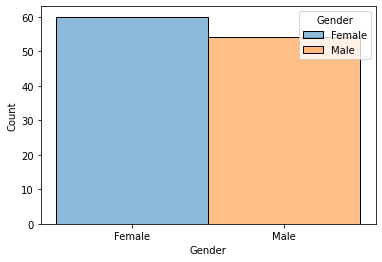

In [19]:
sns.histplot(x='Gender', hue='Gender', data=data)


<AxesSubplot:xlabel='Test_Score', ylabel='Count'>

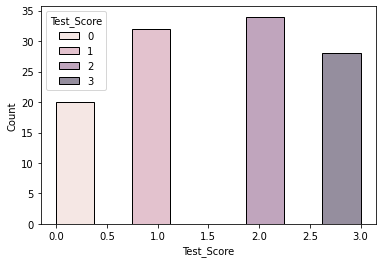

In [20]:
sns.histplot(x='Test_Score', hue='Test_Score', data=data)


<AxesSubplot:xlabel='Age', ylabel='Count'>

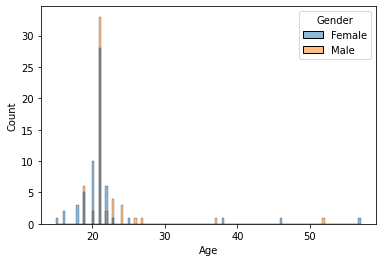

In [21]:

sns.histplot(x='Age', hue='Gender', data=data)


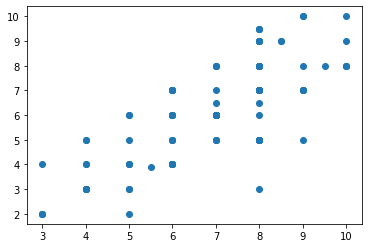

In [22]:


plt.scatter(data.Interface_1, data.Interface_3)
plt.show()

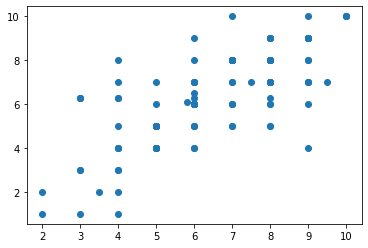

In [23]:

plt.scatter(data.Interface_4, data.Interface_18)
plt.show()

Green

In [24]:
data[data["Test_Score"] == 0].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_23576\1378091649.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 0].mean()


Id                   54.500000
Age                  21.050000
Openness              4.000000
Extraversion          2.675000
Agreeableness         3.450000
Conscientiousness     3.025000
Neuroticism           3.150000
Interface_1           6.925000
Interface_2           6.210000
Interface_3           5.820000
Interface_4           6.190000
Interface_5           6.800000
Interface_6           5.745000
Interface_7           7.100000
Interface_8           5.245000
Interface_9           5.350000
Interface_10          8.875000
Interface_11          6.725000
Interface_12          5.485000
Interface_13          7.390000
Interface_14          5.750000
Interface_15          5.850000
Interface_16          6.575000
Interface_17          7.515000
Interface_18          5.768364
Interface_19          6.295374
Test_Score            0.000000
Top_1                 8.050000
Top_2                 9.650000
Top_3                 9.450000
dtype: float64

Blue

In [25]:
data[data["Test_Score"] == 1].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_23576\3555718546.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 1].mean()


Id                   57.656250
Age                  23.375000
Openness              4.109375
Extraversion          3.750000
Agreeableness         3.750000
Conscientiousness     2.406250
Neuroticism           3.406250
Interface_1           6.984375
Interface_2           6.000000
Interface_3           6.328125
Interface_4           6.593750
Interface_5           7.375000
Interface_6           5.687500
Interface_7           7.078125
Interface_8           4.265625
Interface_9           4.406250
Interface_10          8.281250
Interface_11          7.062500
Interface_12          6.125000
Interface_13          7.781250
Interface_14          6.546875
Interface_15          6.734375
Interface_16          7.453125
Interface_17          7.890625
Interface_18          6.563581
Interface_19          5.950467
Test_Score            1.000000
Top_1                 9.656250
Top_2                11.187500
Top_3                10.687500
dtype: float64

Gold

In [26]:
data[data["Test_Score"] == 2].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_23576\3326052888.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 2].mean()


Id                   60.058824
Age                  21.882353
Openness              4.102941
Extraversion          3.500000
Agreeableness         3.544118
Conscientiousness     2.397059
Neuroticism           3.588235
Interface_1           6.779412
Interface_2           6.205882
Interface_3           6.102941
Interface_4           6.720588
Interface_5           6.573529
Interface_6           5.352941
Interface_7           7.088235
Interface_8           4.661765
Interface_9           4.514706
Interface_10          8.661765
Interface_11          6.655882
Interface_12          6.176471
Interface_13          7.667647
Interface_14          6.897059
Interface_15          6.852941
Interface_16          7.441176
Interface_17          8.029412
Interface_18          6.751017
Interface_19          6.365146
Test_Score            2.000000
Top_1                10.352941
Top_2                11.441176
Top_3                10.852941
dtype: float64

Orange

In [27]:
data[data["Test_Score"] == 3].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_23576\2886798128.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 3].mean()


Id                   56.357143
Age                  21.035714
Openness              3.964286
Extraversion          3.160714
Agreeableness         3.410714
Conscientiousness     2.803571
Neuroticism           3.339286
Interface_1           7.089286
Interface_2           6.375000
Interface_3           6.107143
Interface_4           5.964286
Interface_5           6.678571
Interface_6           5.821429
Interface_7           6.857143
Interface_8           5.160714
Interface_9           4.910714
Interface_10          8.357143
Interface_11          7.446429
Interface_12          5.571429
Interface_13          7.035714
Interface_14          6.839286
Interface_15          6.678571
Interface_16          6.910714
Interface_17          8.267857
Interface_18          5.697664
Interface_19          6.246963
Test_Score            3.000000
Top_1                 9.642857
Top_2                 9.964286
Top_3                10.750000
dtype: float64

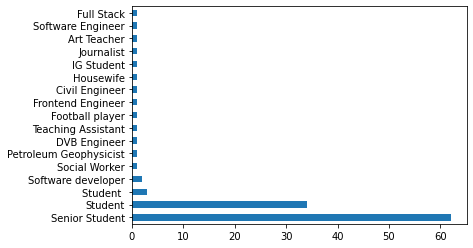

In [28]:
data.Occupation.value_counts().plot.barh()
plt.show()

Plot for all interfaces to see ratings vs  counts

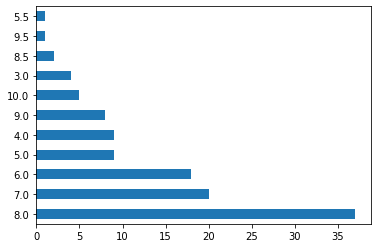

In [29]:
data.Interface_1.value_counts().plot.barh()
plt.show()

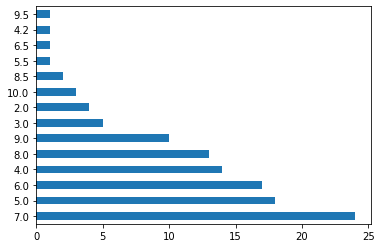

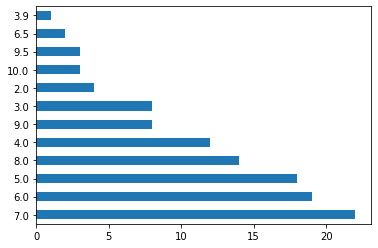

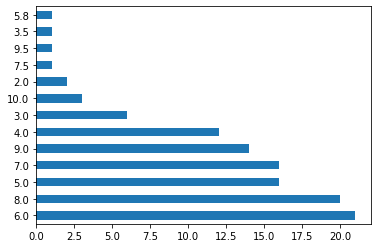

In [30]:
data.Interface_2.value_counts().plot.barh()
plt.show()
data.Interface_3.value_counts().plot.barh()
plt.show()
data.Interface_4.value_counts().plot.barh()
plt.show()

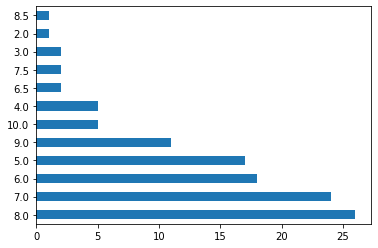

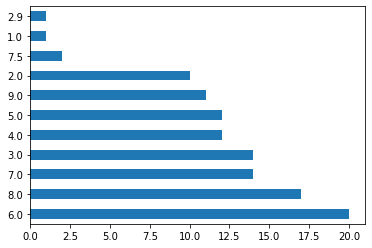

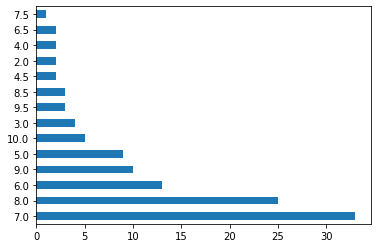

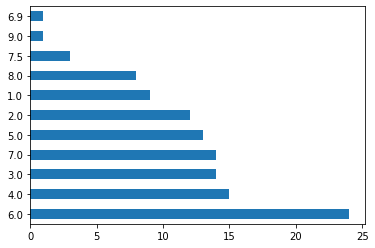

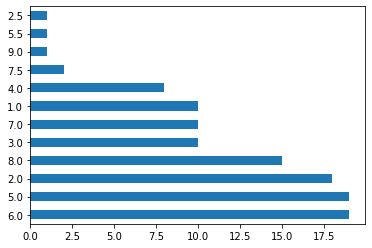

In [31]:
data.Interface_5.value_counts().plot.barh()
plt.show()
data.Interface_6.value_counts().plot.barh()
plt.show()
data.Interface_7.value_counts().plot.barh()
plt.show()
data.Interface_8.value_counts().plot.barh()
plt.show()
data.Interface_9.value_counts().plot.barh()
plt.show()


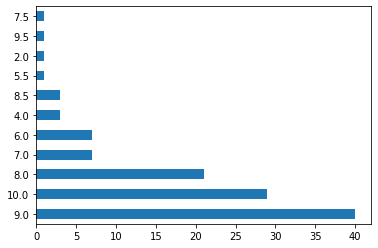

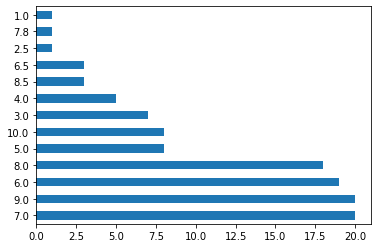

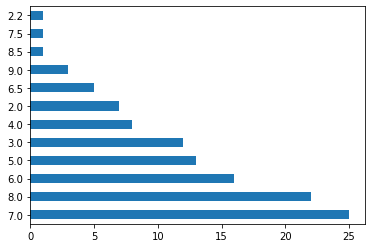

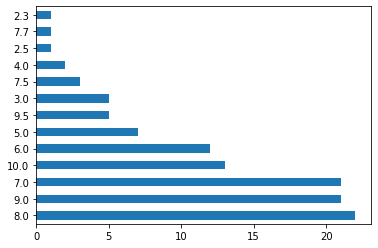

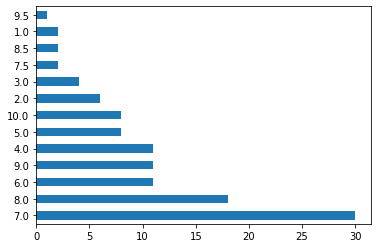

In [32]:
data.Interface_10.value_counts().plot.barh()
plt.show()
data.Interface_11.value_counts().plot.barh()
plt.show()
data.Interface_12.value_counts().plot.barh()
plt.show()
data.Interface_13.value_counts().plot.barh()
plt.show()
data.Interface_14.value_counts().plot.barh()
plt.show()


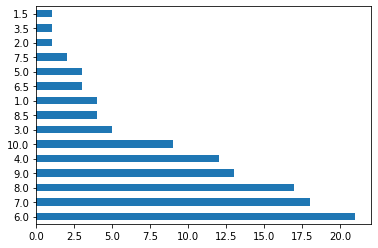

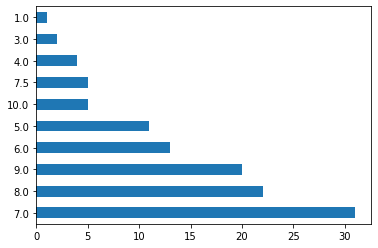

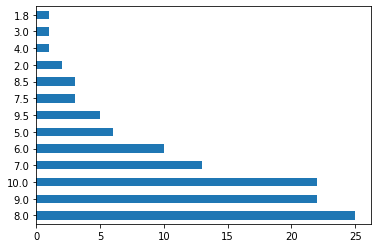

In [33]:
data.Interface_15.value_counts().plot.barh()
plt.show()
data.Interface_16.value_counts().plot.barh()
plt.show()
data.Interface_17.value_counts().plot.barh()
plt.show()



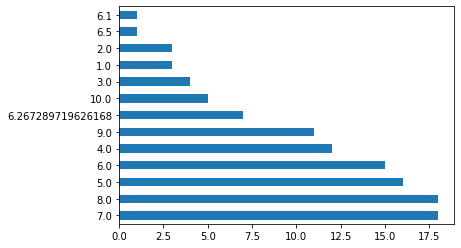

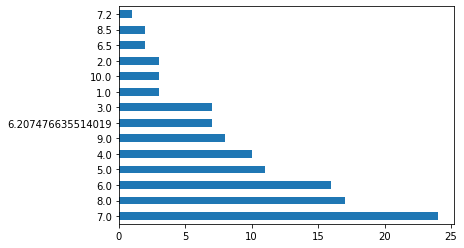

In [34]:
data.Interface_18.value_counts().plot.barh()
plt.show()
data.Interface_19.value_counts().plot.barh()
plt.show()

Top 3 ratings columns

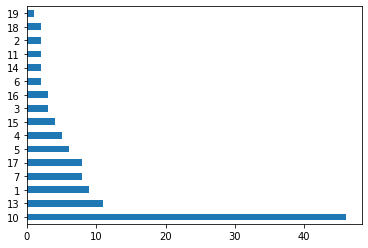

In [35]:
data.Top_1.value_counts().plot.barh()
plt.show()


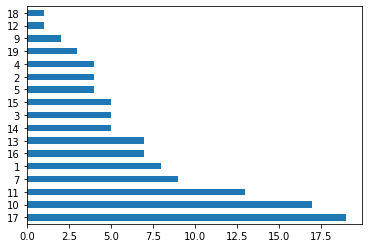

In [36]:
data.Top_2.value_counts().plot.barh()
plt.show()

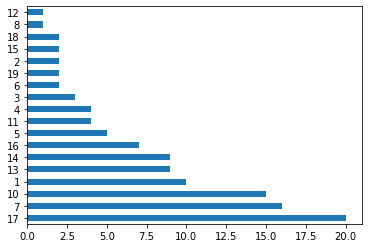

In [37]:
data.Top_3.value_counts().plot.barh()
plt.show()

<AxesSubplot:xlabel='Interface_1', ylabel='Interface_3'>

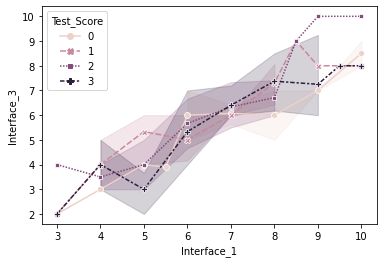

In [38]:
sns.lineplot(x = "Interface_1",y = "Interface_3",data = data,hue = "Test_Score",style = "Test_Score",markers=True)

In [39]:
new = data.groupby("Top_1")["Test_Score"].count()
new

Top_1
1      9
2      2
3      3
4      5
5      6
6      2
7      8
10    46
11     2
13    11
14     2
15     4
16     3
17     8
18     2
19     1
Name: Test_Score, dtype: int64

In [40]:
new = data.groupby("Test_Score")["Top_2"].count()
new

Test_Score
0    20
1    32
2    34
3    28
Name: Top_2, dtype: int64

In [41]:
data['Extraversion']

0      2.0
1      5.0
2      4.0
3      3.0
4      2.0
      ... 
109    3.0
110    1.0
111    1.0
112    4.0
113    3.0
Name: Extraversion, Length: 114, dtype: float64

In [42]:
introversion = data.loc[data.Extraversion < 3, 'Extraversion']
introversion.count()


29

In [43]:
Extraversion_persons = data.loc[data.Extraversion > 3, 'Extraversion'] 
Extraversion_persons.count()


55